In [15]:
import numpy as np

In [16]:
# https://web.eecs.umich.edu/~justincj/teaching/eecs442/notes/linear-backprop.html

In [17]:
class Linear:
    def __init__(self, num_in, num_out, use_bias = True) -> None:
        self.use_bias = use_bias
        self.num_in = num_in
        self.num_out = num_out
        self.matr = np.random.normal(0, 1., (num_in + (1 if use_bias else 0), num_out))
        self.grads = np.zeros_like(self.matr)
        self.last_xs = None

    def get_grad(self, upstream_resp_loss: np.ndarray) -> np.ndarray:
        # divvy up the blame!
        # except now, just do it with the last inputs

        # the loss 'attributed' that we will pass up, (the loss 'attributed' to inputs) is proportonial to the weight mat
        if not self.use_bias:
            dloss_din = upstream_resp_loss @ self.matr.T
        else:
            # chop off the bias!
            dloss_din = upstream_resp_loss @ self.matr[:-1, :].T

        # the loss 'attributed' to the weights is directly proportional to the inputs we recieved
        dloss_dweights = self.last_xs.T @ upstream_resp_loss

        assert self.grads.shape == dloss_dweights.shape
        self.grads = dloss_dweights

        return dloss_din

    def forward(self, xs: np.ndarray, no_record: bool = False) -> np.ndarray:
        # fix xs, if we need bias
        fixed_xs = xs
        if self.use_bias:
            fixed_xs = np.hstack((fixed_xs, np.ones((fixed_xs.shape[0], 1))))
        
        if not no_record:
            self.last_xs = fixed_xs
        
        return fixed_xs @ self.matr

In [18]:
class MSELoss:
    def __init__(self) -> None:
        self.last_diffs = None

    def get_grad(self) -> np.ndarray:
        return 2.*self.last_diffs/len(self.last_diffs)

    def forward(self, y: np.ndarray, y_exp) -> np.ndarray:
        self.last_diffs = y - y_exp
        return np.mean(self.last_diffs**2)

In [19]:
xs = np.linspace(-10, 10, 1000)
ys = xs*10 + 2
xs += np.random.normal(0.,.1, len(xs))

xs = xs.reshape(-1, 1)
ys = ys.reshape(-1, 1)

In [20]:
import matplotlib.pyplot as plt

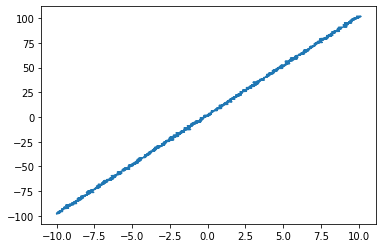

In [21]:
plt.plot(xs, ys)

In [22]:
def mse(y, yexp): return np.mean((y-yexp)**2)

In [23]:
x_with_bias = np.hstack((xs, np.ones((xs.shape[0], 1))))

In [24]:
LR = .001

In [25]:
lin = Linear(2, 1, use_bias=False)
lossf = MSELoss()

for _ in range(3000):
    out = lin.forward(x_with_bias)
    loss = lossf.forward(out, ys)
    print(f"{loss=}")
    
    loss_grad = lossf.get_grad()
    lin.get_grad(loss_grad)

    lin.matr += lin.grads*-LR

lin.matr
# plt.show()

loss=2817.445648280917
loss=2453.903080631155
loss=2137.345681046211
loss=1861.7007299219342
loss=1621.6803929564273
loss=1412.6802764924992
loss=1230.6910943536327
loss=1072.221751542475
loss=934.2323691980675
loss=814.0759659265243
loss=709.4476766883747
loss=618.3405350303568
loss=539.0069703641649
loss=469.92528163520734
loss=409.77044419417297
loss=357.38868981469926
loss=311.77537218650997
loss=272.0556932437131
loss=237.46792057176157
loss=207.3487739267657
loss=181.12070051427435
loss=158.28079490961548
loss=138.3911510535779
loss=121.0704612309238
loss=105.98670086200681
loss=92.85075876859891
loss=81.410890713514
loss=71.4478898077423
loss=62.770881131586314
loss=55.213659891543514
loss=48.631502862164
loss=42.898391941867665
loss=37.90459655791761
loss=33.5545685401066
loss=29.765109077277675
loss=26.463772590585698
loss=23.58747690254525
loss=21.081293038598062
loss=18.89739144410246
loss=16.994124400402917
loss=15.33522703655579
loss=13.889121608489841
loss=12.628311698517

array([[9.99406251],
       [1.99451199]])

In [26]:
# lin = Linear(1, 1, use_bias=True)
# lossf = MSELoss()

# for _ in range(3000):
#     out = lin.forward(xs)
#     loss = lossf.forward(out, ys)
#     print(f"{loss=}")
    
#     loss_grad = lossf.get_grad()
#     lin.get_grad(loss_grad)
#     lin.matr += lin.grads*-LR

# lin.matr

In [27]:
# lin1 = Linear(2, 2, use_bias=False)
# lin2 = Linear(2, 1, use_bias=False)
# lossf = MSELoss()

# for _ in range(3000):
#     out_l1 = lin1.forward(x_with_bias)
#     out = lin2.forward(out_l1)

#     loss = lossf.forward(out, ys)
#     print(f"{loss=}")
    
#     pass_back_grad = lossf.get_grad()
#     pass_back_grad = lin2.get_grad(pass_back_grad)
#     pass_back_grad = lin1.get_grad(pass_back_grad)

#     lin1.matr += lin1.grads*-LR
#     lin2.matr += lin2.grads*-LR

# print(f"{lin1.matr @ lin2.matr=}")